#### Importando bibliotecas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#### Importando o dataset:

In [2]:
df = pd.read_csv("insurance.csv")

## Análise exploratória dos dados:

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Obtendo informações sobre linhas e colunas do dataset:

In [4]:
numRows, numColumns = df.shape
columns_names = list(df.columns)

print("Número de linhas: ", numRows, "\nNúmero de colunas: ", numColumns)
print("Nome das colunas: ", columns_names)

Número de linhas:  1338 
Número de colunas:  7
Nome das colunas:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


#### Verificando se há dados faltantes:

In [5]:
# Informações de cada coluna do Dataset: Nome da coluna; Número de células nulas na coluna
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
pd.isna(df).any(axis=1).sum() # soma as linhas que apresentam uma ou mais células vazias

0

#### Verificando o tipo dos valores de cada coluna:

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### Informações sobre cada coluna:

##### Coluna "age" (idade)

In [8]:
age_values = (df.age.value_counts(sort = False)).index
age_min = df.age.min()
age_max = df.age.max()

print("Idades presentes na coluna age: ", list(age_values))
print("Menor Idade: ", age_min)
print("Maior Idade: ", age_max)

Idades presentes na coluna age:  [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]
Menor Idade:  18
Maior Idade:  64


##### Coluna "sex" (gênero)

In [9]:
sex_values = (df.sex.value_counts(sort = False)).index

print("Valores presentes na coluna sex: ", list(sex_values))

Valores presentes na coluna sex:  ['male', 'female']


##### Coluna "bmi" (IMC)

In [10]:
bmi_values = (df.bmi.value_counts(sort = False)).index
bmi_min = df.bmi.min()
bmi_max = df.bmi.max()

print("Menor IMC: ", bmi_min)
print("Maior IMC: ", bmi_max)

Menor IMC:  15.96
Maior IMC:  53.13


##### Coluna "children" (filhos)

In [11]:
children_values = (df.children.value_counts(sort = False)).index
children_min = df.children.min()
children_max = df.children.max()

print("Quantidades de filhos presentes na coluna children: ", list(children_values))
print("Menor quantidade de filhos: ", children_min)
print("Maior quantidade de filhos: ", children_max)

Quantidades de filhos presentes na coluna children:  [0, 1, 2, 3, 4, 5]
Menor quantidade de filhos:  0
Maior quantidade de filhos:  5


##### Coluna "smoker" (fumante)

In [12]:
smoker_values = (df.smoker.value_counts(sort = False)).index

print("Valores presentes na coluna smoker: ", list(smoker_values))

Valores presentes na coluna smoker:  ['no', 'yes']


##### Coluna "region" (região)

In [13]:
region_values = (df.region.value_counts(sort = False)).index

print("Valores presentes na coluna region: ", list(region_values))

Valores presentes na coluna region:  ['northeast', 'southeast', 'southwest', 'northwest']


##### Coluna "charges" (custos)

In [14]:
charges_values = (df.charges.value_counts(sort = False)).index
charges_min = df.charges.min()
charges_max = df.charges.max()
charges_mean = df.charges.mean()

print("Média custo: ", charges_mean)
print("Menor custo: ", charges_min)
print("Maior custo: ", charges_max)

Média custo:  13270.422265141257
Menor custo:  1121.8739
Maior custo:  63770.42801


## Descrição do Dataset com base nas informações obtidas acima

**Base de dados**: insurance.csv

O conjunto de dados possui **1338 entradas** sem dados faltantes e possui as seguintes **7 instâncias**:

  - age (idade) -  a idade do indivíduo
      - Atributo Numérico Discreto: números inteiros entre 18 e 64

  - sex (genêro) - a genêro do indivíduo
      - Atributo Categórico com 2 valores possíveis: 'female' ou 'male'

  - bmi (IMC) - IMC (Índice de Massa Corpória) do indíviduo
      - Atributo Numérico Contínuo: números recionais entre 15.96 e 53.13
  
  - children (filhos) - número de filhos do indíviduo 
      - Atributo Numérico Discreto: números inteiros entre 0 e 5
      
  - smolker (fumante) - indica se o indívidio é fumante ou não
       - Atributo Categórico com 2 valores possíveis: 'yes' ou 'no'
       
  - region (região) - região em que mora o indíviduo
      - Atributo Categórico com 4 valores possíveis: 'southeast', 'southwest', 'northwest' ou 'northeast'
  
  - charges (custo) - custo médico do indíviduo
      - Atributo Numérico Contínuo: números recionais entre 1121.8739 e 63770.42801
 

## Separando o Dataset em atributos numéricos e atributos categóricos

In [15]:
num_features = list(df.select_dtypes(include=np.number).columns) # Retorna os nomes das colunas numéricas do dataset
cat_features = list(np.setdiff1d(columns_names,num_features)) # Retorna a lista columns_names - num_features

print("Atributos Numéricos: ", num_features, "\nAtributos Categóricos: ", cat_features)

Atributos Numéricos:  ['age', 'bmi', 'children', 'charges'] 
Atributos Categóricos:  ['region', 'sex', 'smoker']


#### O método abaixo ("describe()") mostra as seguintes características estatísticas básicas de cada coluna do tipo numérica:  

1.   número de células não vazias
2.   média
3.   desvio padrão
4.   menor valor
5.   $0.25\%$ quartil
6.   $0.50\%$ quartil
7.   $0.75\%$ quartil
8.   maior valor

In [16]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Utilizando agora mesmo método ("describe()") para as colunas não numéricas, para essas céluas ele mostra os seguintes dados de cada coluna:  

1.   número de células não vazias
2.   valores únicos
3.   valor que mais aperece
4.   frequência do valor que mais aparece


In [17]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### Visualizando a distribuição dos valores para as colunas categóricas

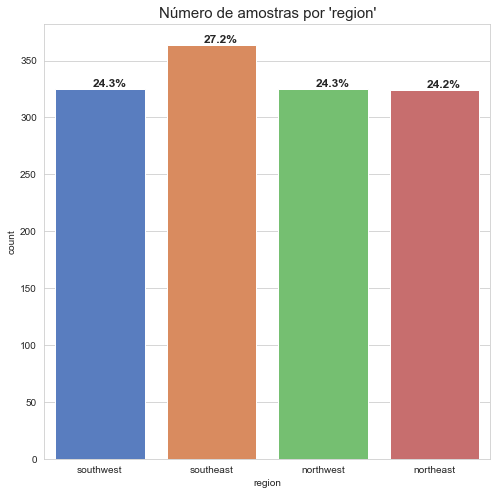

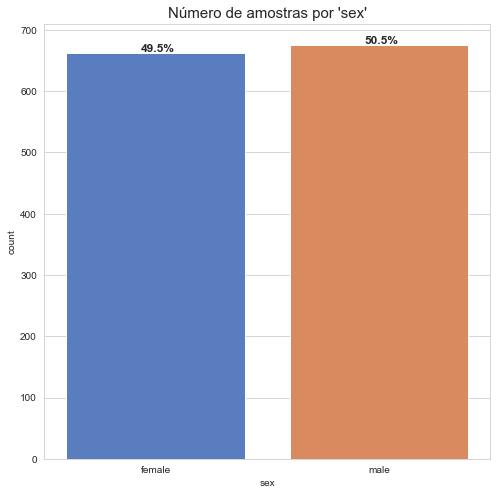

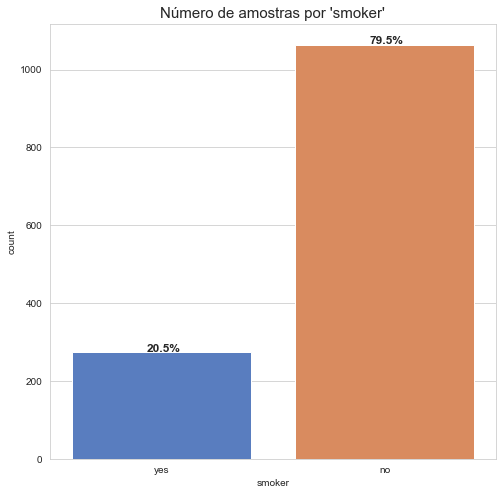

In [18]:
for cat_feature in cat_features:
    
    plt.figure(figsize=(8,8))
    sns.set_style("whitegrid")
    ax = sns.countplot(x = df[cat_feature],label="Count", palette = "muted")
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width() / 2.4,rect.get_height()+2,"%.1f%%"% (rect.get_height()/ numRows *100), 
                 weight='bold', fontsize = 12 )
    plt.title("Número de amostras por '" + str(cat_feature) + "'", fontsize = 15)


#### Visualizando a distribuição dos valores para as colunas numéricas

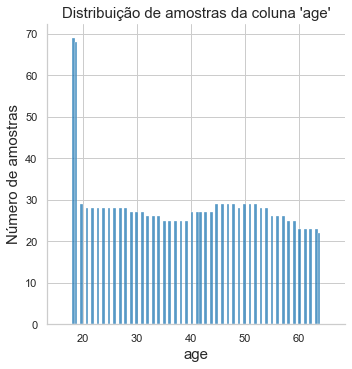

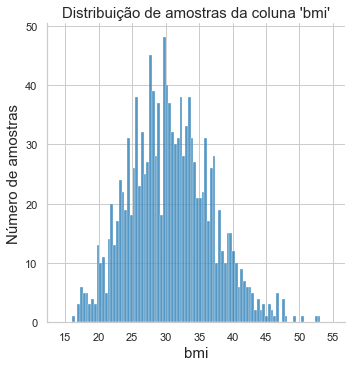

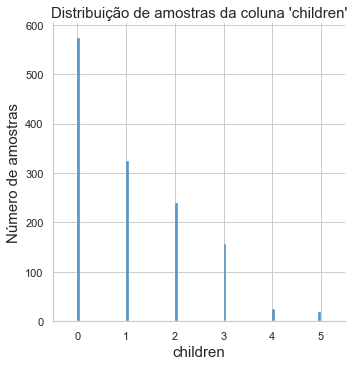

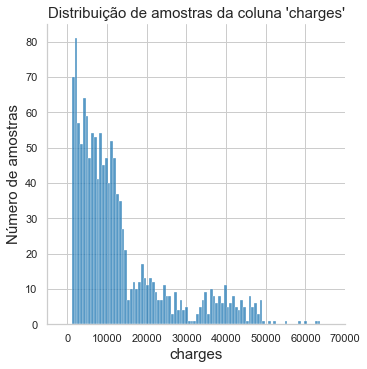

In [19]:
for num_feature in num_features:
    
    plt.rcParams['figure.figsize'] = [20, 20]
    sns.set(style = 'whitegrid')

    sns.displot(df[num_feature], bins = 90, color = '#1f77b4')
    plt.ylabel("Número de amostras", fontsize = 15)
    plt.xlabel(str(num_feature), fontsize = 15)
    plt.margins(x = 0.1)
    plt.title("Distribuição de amostras da coluna '" + str(num_feature) + "'", fontsize = 15)

## Analisando a relação de cada Atributo com a coluna target (charges)

### Region (região)

Text(0.5, 1.0, "'region' vs 'charges'")

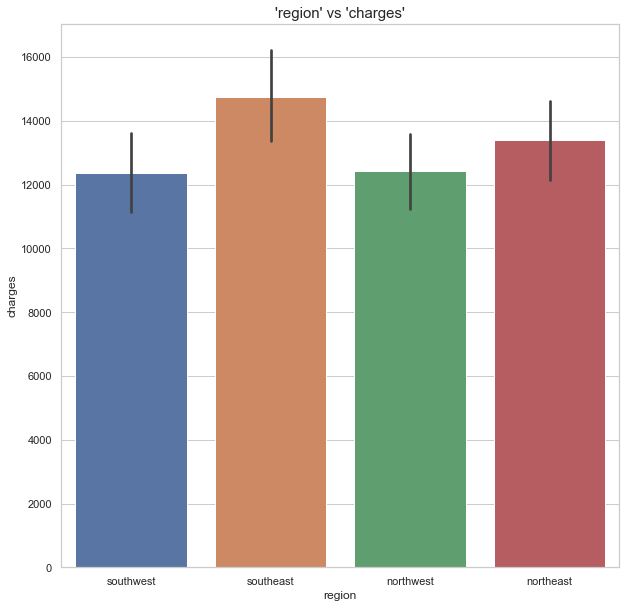

In [20]:
plt.rcParams['figure.figsize'] = [10, 10]
sns_grad = sns.barplot(x = df['region'], y = df['charges'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=0)
plt.title("'region' vs '" + num_feature + "'", fontsize = 15)

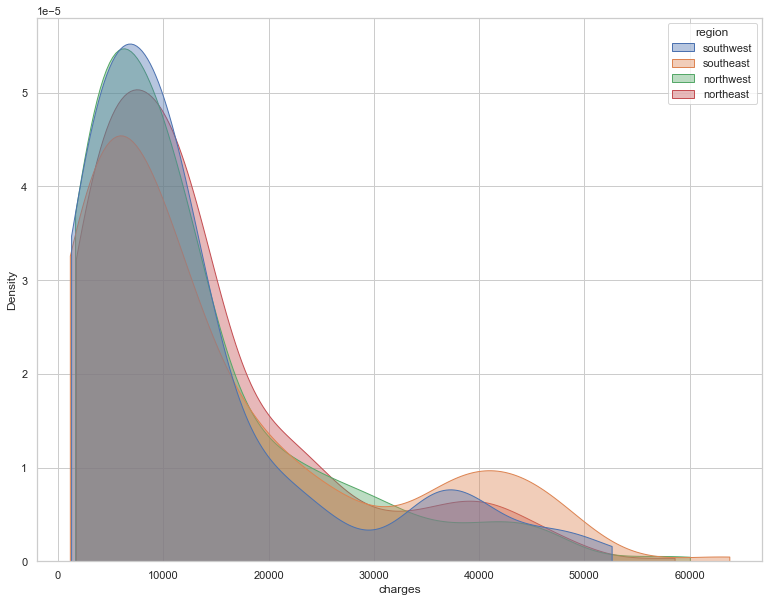

In [21]:
plt.rcParams['figure.figsize'] = [13, 10]
sns.set(style="whitegrid")

sns.kdeplot(data=df, x="charges", hue="region", cut=0, fill=True, common_norm=False, alpha=0.4)
plt.show()

A região em que a pessoa mora não tem influência no custo com a pessoa já que as 4 regiões possuem uma distribuição/densidade em relação aos custo(charges) muito próximas. Uma observção que pode ser feita é que morar na região "southeast" tem um pouco de impacto.

### Sex (gênero)

Text(0.5, 1.0, "'sex' vs 'charges'")

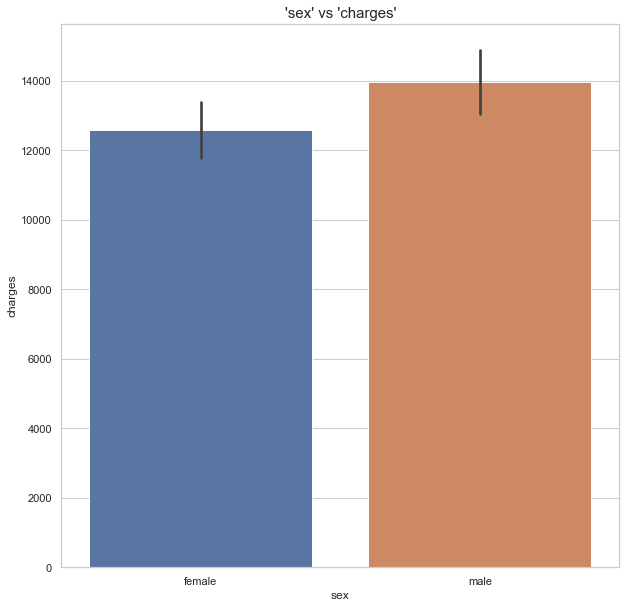

In [22]:
plt.rcParams['figure.figsize'] = [10, 10]
sns_grad = sns.barplot(x = df['sex'], y = df['charges'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=0)
plt.title("'sex' vs '" + num_feature + "'", fontsize = 15)

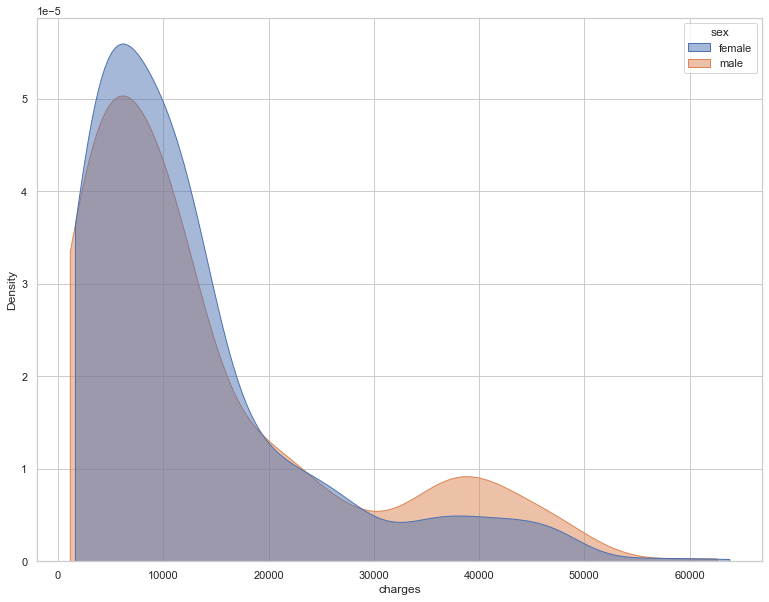

In [23]:
plt.rcParams['figure.figsize'] = [13, 10]
sns.set(style="whitegrid")

sns.kdeplot(data=df, x="charges", hue="sex", cut=0, fill=True, common_norm=False, alpha=0.5)
plt.show()

O gênero não tem influência no custo com a pessoa já que homens e mulheres possuem uma distribuição/densidade em relação aos custo(charges) muito próximas.

### Smoker (fumante)

Text(0.5, 1.0, "'smoker' vs 'charges'")

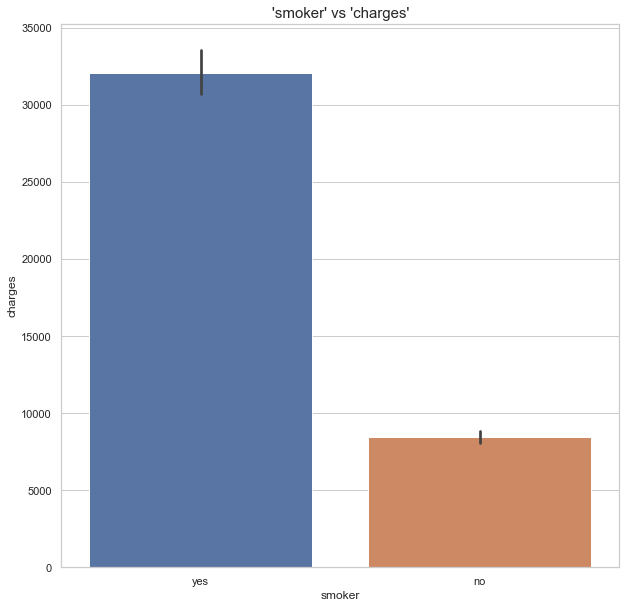

In [24]:
plt.rcParams['figure.figsize'] = [10, 10]
sns_grad = sns.barplot(x = df['smoker'], y = df['charges'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=0)
plt.title("'smoker' vs '" + num_feature + "'", fontsize = 15)

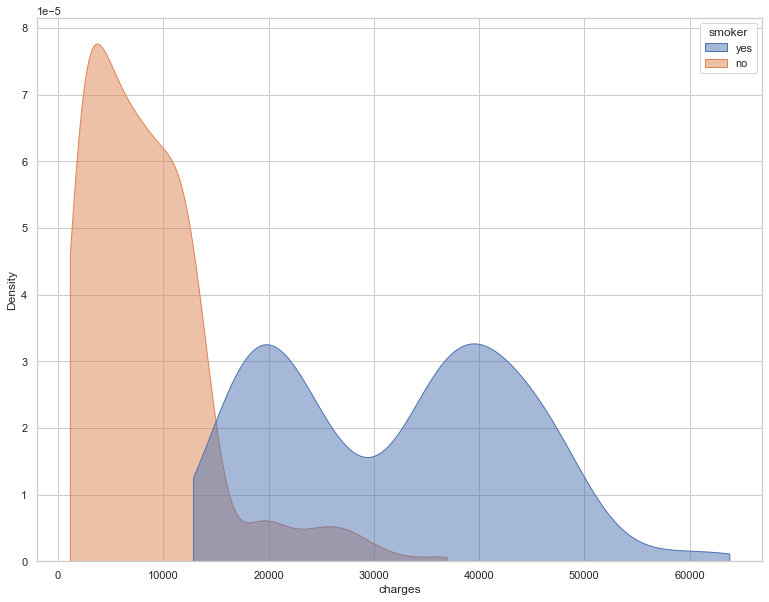

In [25]:
plt.rcParams['figure.figsize'] = [13, 10]
sns.set(style="whitegrid")

sns.kdeplot(data=df, x="charges", hue="smoker", cut=0, fill=True, common_norm=False, alpha=0.5)
plt.show()

Ser fumante tem impacto no custo com a pessoa como esperado já que a distribuição / densidade tem uma grande diferença.

### Children (filhos)

Text(0.5, 1.0, "'children' vs 'charges'")

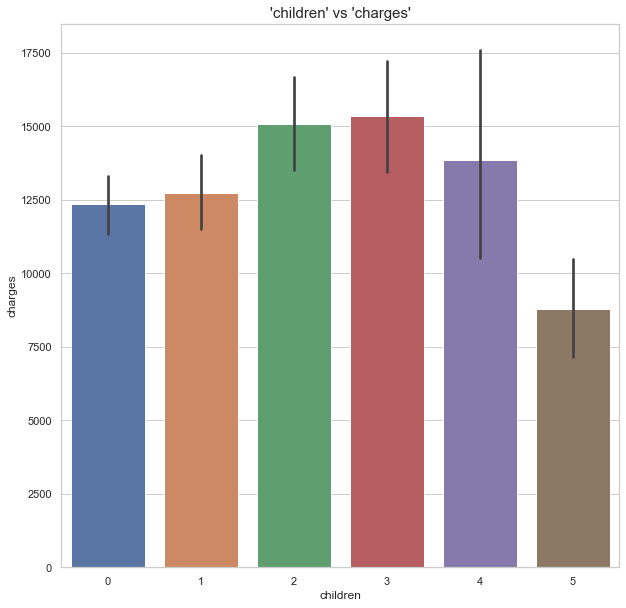

In [26]:
plt.rcParams['figure.figsize'] = [10, 10]
sns_grad = sns.barplot(x = df['children'], y = df['charges'], data = df)
plt.setp(sns_grad.get_xticklabels(), rotation=0)
plt.title("'children' vs '" + num_feature + "'", fontsize = 15)

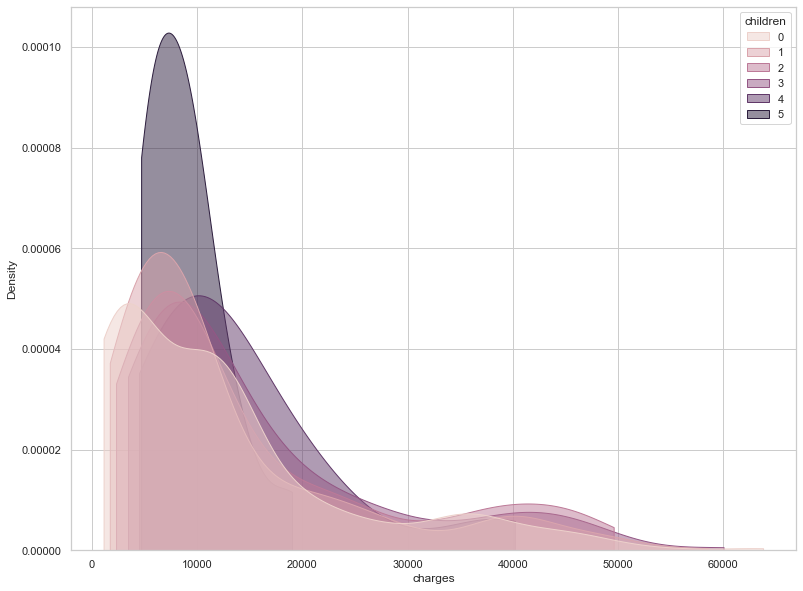

In [27]:
plt.rcParams['figure.figsize'] = [13, 10]
sns.set(style="whitegrid")

sns.kdeplot(data=df, x="charges", hue="children", cut=0, fill=True, common_norm=False, alpha=0.5)
plt.show()

A quantidade de filhos em sua maioria não tem impacto no custo com a pessoa o já que a distribuição / densidade são bem próximos, exceto pelo número de filhos igual à 5.

In [28]:
numerical_df = df[num_features]
categorical_df = df[cat_features]

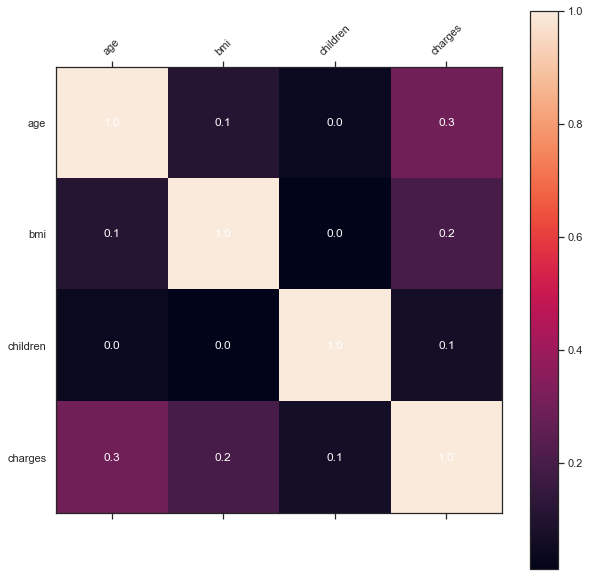

In [29]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set_theme(style="white")
plt.matshow(numerical_df.corr())
plt.colorbar()
plt.xticks(np.arange(len(numerical_df.corr().columns)), numerical_df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(numerical_df.corr().columns)), numerical_df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(numerical_df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=12)

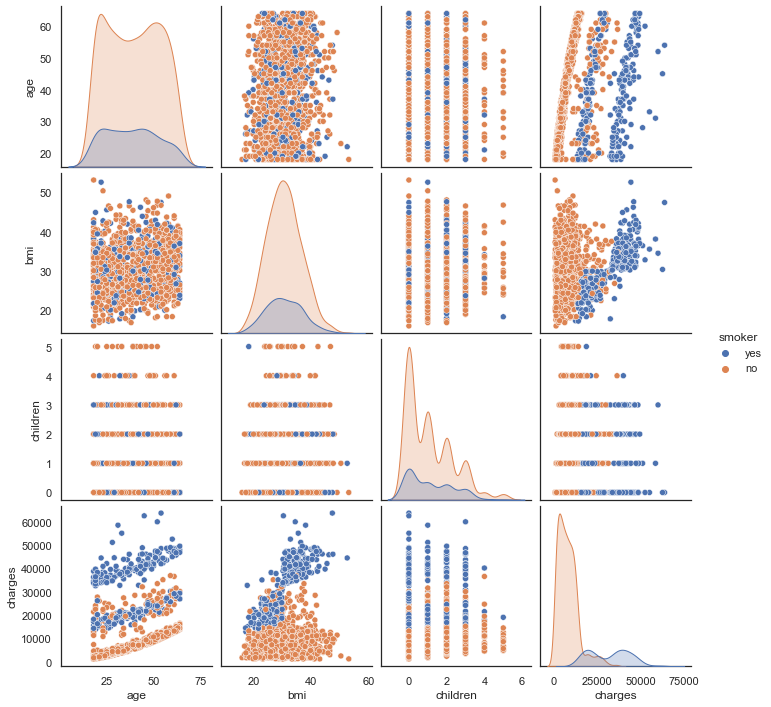

In [30]:
sns.pairplot(df, vars= numerical_df, hue='smoker')

### bmi (IMC)

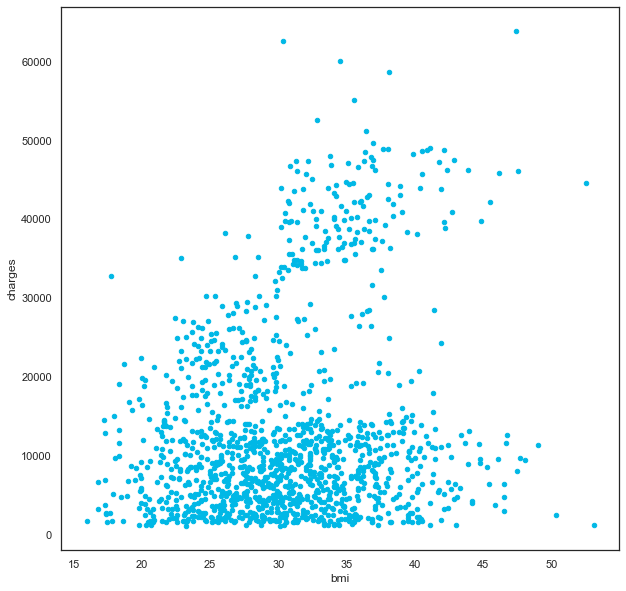

In [31]:
plt.rcParams['figure.figsize'] = [10, 10]
df.plot(kind = 'scatter', x = 'bmi', y = 'charges', color = "#00b8e6")
plt.show()

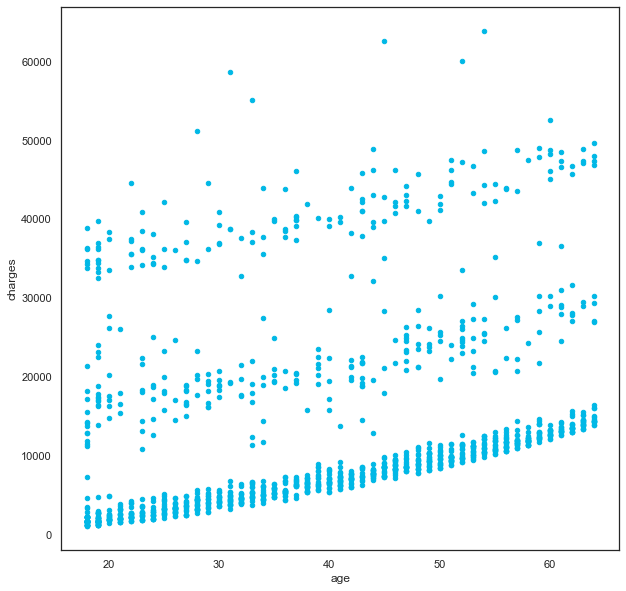

In [32]:
df.plot(kind = 'scatter', x = 'age', y = 'charges', color = "#00b8e6")
plt.show()

### Criando uma nova coluna "bmi_classif"

Esta nova coluna classificará o iníviduo de acordo com seu bmi (IMC) seguindo a tabela abaixo:

![image.png](https://www.ricardogozzano.com.br/wp-content/uploads/2020/03/tabela_imc.png)

In [44]:
conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >= 35) & (df['bmi'] < 40),
    (df['bmi'] >= 40)]
choices = ['Abaixo', 'Normal', 'Acima', 'Obesidade','Extrema Obesidade', 'Obesidade Mórbida']
df["bmi_classif"] = np.select(conditions, choices, default='Normal')

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_classif
0,19,female,27.900,0,yes,southwest,16884.92400,Acima
1,18,male,33.770,1,no,southeast,1725.55230,Obesidade
2,28,male,33.000,3,no,southeast,4449.46200,Obesidade
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Acima


### Visualizando a relação entre os atributos idade, ser fumante e a classificação de acordo com o IMC com o target

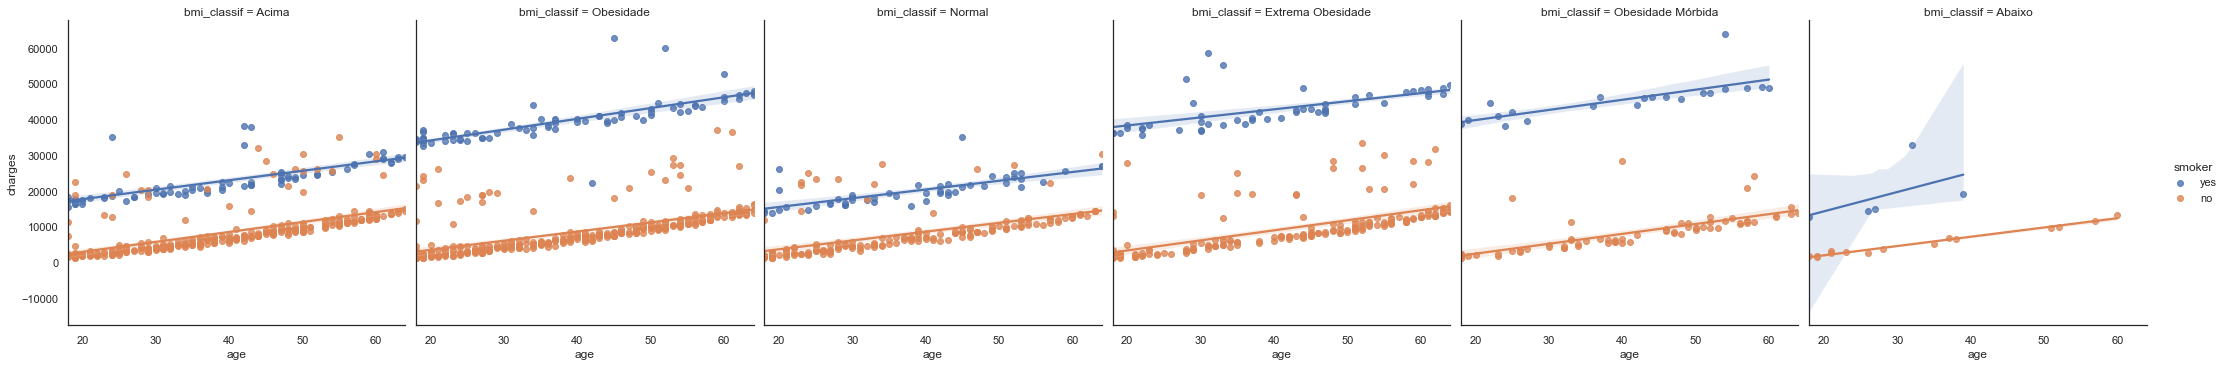

In [46]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.lmplot(x='age',y='charges',hue='smoker', col='bmi_classif',data=df)

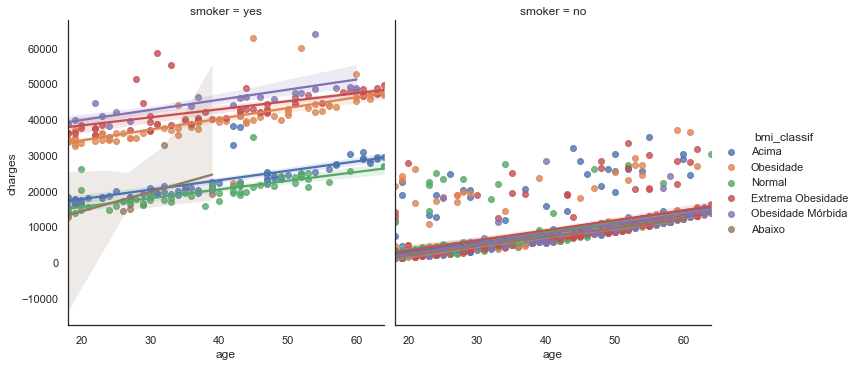

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.lmplot(x='age',y='charges',hue='bmi_classif', col='smoker',data=df)

## Regressão Linear

In [48]:
%matplotlib inline
from IPython.display import Image  
import statsmodels.api as sm

## Pearson

In [49]:
teste = df.copy()
teste.smoker = teste.smoker.map(dict(yes=1, no=0))
conditions = [
    (teste['bmi'] < 30) & (teste['smoker'] == 1),
    (teste['bmi'] >= 18.5) & (teste['bmi'] < 25) & (teste['smoker'] == 1),
    (teste['bmi'] >= 25) & (teste['bmi'] < 30) & (teste['smoker'] == 1),
    (teste['bmi'] >= 30) & (teste['bmi'] < 35) & (teste['smoker'] == 1),
    (teste['bmi'] >= 35) & (teste['smoker'] == 1)]
choices = [1, 2, 3, 4,5]
teste["bmi_smoker_classif"] = np.select(conditions, choices, default = 0)

conditions = [
    (df['bmi'] < 18.5),
    (df['bmi'] >= 18.5) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >= 35)]
choices = [1, 2, 3, 4, 5]
teste["bmi_classif"] = np.select(conditions, choices, default='Normal')

In [50]:
teste

,age,sex,bmi,children,smoker,region,charges,bmi_classif,bmi_smoker_classif
0,19,female,27.900,0,1,southwest,16884.92400,3,1
1,18,male,33.770,1,0,southeast,1725.55230,4,0
2,28,male,33.000,3,0,southeast,4449.46200,4,0
3,33,male,22.705,0,0,northwest,21984.47061,2,0
4,32,male,28.880,0,0,northwest,3866.85520,3,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,4,0
1334,18,female,31.920,0,0,northeast,2205.98080,4,0
1335,18,female,36.850,0,0,southeast,1629.83350,5,0
1336,21,female,25.800,0,0,southwest,2007.94500,3,0


In [51]:
teste2 = pd.get_dummies(teste[['region', 'sex', 'smoker']])
teste = pd.concat([teste2, teste[['age','bmi','charges','bmi_classif','bmi_smoker_classif']]], axis=1, join="inner")
teste.corr(method='pearson')

,smoker,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age,bmi,charges,bmi_smoker_classif
smoker,1.000000,0.002811,-0.036945,0.068498,-0.036945,-0.076185,0.076185,-0.025019,0.003750,0.787251,0.818866
region_northeast,0.002811,1.000000,-0.320177,-0.345561,-0.320177,0.002425,-0.002425,0.002475,-0.138156,0.006349,-0.030940
region_northwest,-0.036945,-0.320177,1.000000,-0.346265,-0.320829,0.011156,-0.011156,-0.000407,-0.135996,-0.039905,-0.067659
region_southeast,0.068498,-0.345561,-0.346265,1.000000,-0.346265,-0.017117,0.017117,-0.011642,0.270025,0.073982,0.112296
region_southwest,-0.036945,-0.320177,-0.320829,-0.346265,1.000000,0.004184,-0.004184,0.010016,-0.006205,-0.043210,-0.017966
sex_female,-0.076185,0.002425,0.011156,-0.017117,0.004184,1.000000,-1.000000,0.020856,-0.046371,-0.057292,-0.095814
sex_male,0.076185,-0.002425,-0.011156,0.017117,-0.004184,-1.000000,1.000000,-0.020856,0.046371,0.057292,0.095814
age,-0.025019,0.002475,-0.000407,-0.011642,0.010016,0.020856,-0.020856,1.000000,0.109272,0.299008,-0.006694
bmi,0.003750,-0.138156,-0.135996,0.270025,-0.006205,-0.046371,0.046371,0.109272,1.000000,0.198341,0.235445
charges,0.787251,0.006349,-0.039905,0.073982,-0.043210,-0.057292,0.057292,0.299008,0.198341,1.000000,0.862621


In [55]:
df_regres = df.copy()
df_regres.drop("bmi_classif", axis = 1, inplace = True)

conditions = [
    (teste['bmi'] < 30) & (teste['smoker'] == 1),
    (teste['bmi'] >= 30) & (teste['bmi'] < 35) & (teste['smoker'] == 1),
    (teste['bmi'] >= 35) & (teste['smoker'] == 1)]
choices = [1, 2, 3]

# conditions = [
#     (teste['bmi'] < 30) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 18.5) & (teste['bmi'] < 25) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 25) & (teste['bmi'] < 30) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 30) & (teste['bmi'] < 35) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 35) & (teste['smoker'] == 1)]
# choices = [1, 2, 3, 4,5]


# conditions = [
#     (teste['bmi'] < 30) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 30) & (teste['bmi'] < 35) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 35) & (teste['bmi'] < 40) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 40) & (teste['smoker'] == 1)]
# choices = [1, 2, 3,4]

# conditions = [
#     (teste['bmi'] < 30) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 30) & (teste['bmi'] < 35) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 35) & (teste['smoker'] == 1),
#     (teste['bmi'] >= 30) & (teste['smoker'] == 0)]
# choices = [1,2,3,4]

df_regres["bmi_smoker_classif"] = np.select(conditions, choices, default = 0)

df_regres.smoker = df_regres.smoker.map(dict(yes=1, no=0))
df_regres.sex = df_regres.sex.map(dict(female=1, male=0))
df_regres.region = df_regres.region.map(dict(southwest=0, southeast=1,northwest=2,northeast=3))
#df_regres.head()

In [65]:
df_regres.head()

,age,sex,bmi,children,smoker,region,charges,bmi_smoker_classif
0,19,1,27.900,0,1,0,16884.92400,1
1,18,0,33.770,1,0,1,1725.55230,0
2,28,0,33.000,3,0,1,4449.46200,0
3,33,0,22.705,0,0,2,21984.47061,0
4,32,0,28.880,0,0,2,3866.85520,0


In [74]:
X = np.column_stack((df_regres['age'],df_regres['bmi_smoker_classif'],df_regres['region']))
y = df_regres['charges']


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     2424.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:57:59   Log-Likelihood:                -13230.
No. Observations:                1338   AIC:                         2.647e+04
Df Residuals:                    1334   BIC:                         2.649e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2470.5912    430.604     -5.737      0.0

#### O modelo encontrado é igual à: Custos = -2612.69 + 265.27*age +  1.295e+04*bmi_smoker_classif + 402.97*region

In [8]:
!jupyter nbconvert --to html Analise_Insurance.ipynb  

[NbConvertApp] Converting notebook Analise_Insurance.ipynb to html
[NbConvertApp] Writing 1835295 bytes to Analise_Insurance.html
